Assignment 3 resubmission: Web scraping TS lyrics
Natalie Voo Xin Ru
S4228693

In this assignment I am webscraping data from folklore (2020), an album released by singer-songwriter Taylor Swift. This was an album that
has shaped pop culture and has even won Album of the Year at the Grammys, the most prestigious award any artist can receive in their career.

Simple research questions:
- Who wrote the most songs in the album?
- Who were her main collaborators?

Feedback for first submission:
Submission Feedback
Overall Feedback
- The contents of the Readme should be expanded upon. Describe your corpus in detail, e.g., what were the selection criteria? The files in the repository should be documented here, as well as the structure and contents of the CSV file. The usage rights should be explored and explained in more detail to make sure there are no assumptions being made.
- The CSV file is very brief, containing just one row. Relating to processing, the "Title" column should only contain the title, e.g., 'cardigan', not '"cardigan" lyrics', the scraped text should be cleaned and should not be in a list. The tracklist is incomplete.
- The notebook is fine. re library is not imported, but you use it in the code, it is not clear how it can work. It is also unclear why the tracklist is partially hardcoded towards the end of the notebook when it was already scraped a few cells above.
- The repository is well-structured.
- The results of the scraping task are very brief with only one row and incompletely processed columns in the CSV. A more in-depth development of this assignment could include all the songs in the tracklist that you have scraped. Consider the artist page (https://www.azlyrics.com/t/taylorswift.html). You could access the individual tracks by scraping hyperlinks.

- Take into account the feedback you've got.
- Add a very small analysis part to your notebook, to answer a simple question about the data or show an interesting visualization (in that case, you'd have to explain what is interesting about it).

Step 1: Importing packages 

In [118]:

# Import os to upload documents and metadata
import os

# Import pandas DataFrame packages
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

# Import graphing package
import plotly.express as px

import requests
from bs4 import BeautifulSoup
import csv
import time

Step 2: Web scrape the tracklist from artist page

In [39]:

# URL for Taylor Swift's artist page
artist_url = "https://www.azlyrics.com/t/taylorswift.html"

# Fetch the artist page
response = requests.get(artist_url)
response.raise_for_status()  # Raise an error for bad responses
soup = BeautifulSoup(response.text, 'html.parser')

# Initialize a dictionary to store the tracklist
tracklist = {}

# Find the album section for "Folklore" using the specific div ID
album_div = soup.find('div', id='85703')

if album_div:
    # Get the next sibling div that contains the tracklist
    current_div = album_div.find_next_sibling()
    
    # Loop through each track in the tracklist
    while current_div and current_div.name == 'div':
        if 'listalbum-item' in current_div.get('class', []):
            track_name = current_div.find('a').get_text()  # Track name
            tracklist[len(tracklist) + 1] = track_name  # Use track number as key (1-based index)
        current_div = current_div.find_next_sibling()  # Move to the next sibling

# Print the tracklist dictionary
print("Tracklist for 'Folklore':")
for track_number, track_name in tracklist.items():
    print(f"{track_number}: {track_name}")

Tracklist for 'Folklore':
1: the 1
2: cardigan
3: the last great american dynasty
4: exile
5: my tears ricochet
6: mirrorball
7: seven
8: august
9: this is me trying
10: illicit affairs
11: invisible string
12: mad woman
13: epiphany
14: betty
15: peace
16: hoax
17: the lakes


Step 3: Save the tracklist into a csv file

In [41]:


# Convert the tracklist dictionary to a DataFrame
tracklist_df = pd.DataFrame(list(tracklist.items()), columns=['Track Number', 'Track Name'])

# Save the tracklist to a CSV file
csv_file_name = "folklore_tracklist.csv"
tracklist_df.to_csv(csv_file_name, index=False)

print(f"Tracklist for 'Folklore' has been saved to {csv_file_name}.")

Tracklist for 'Folklore' has been saved to folklore_tracklist.csv.


Step 4: Webscrape lyrics and add it to a new column in the csv file

In [59]:

def scrape_lyrics(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Locate the lyrics in the HTML structure
    lyrics_tag = soup.find_all("div", attrs={"class": None, "id": None})
    
    lyrics = []
    for content in lyrics_tag:
        line = content.get_text(separator=" ")
        lyrics.append(line.strip())
    
    # Join the lyrics into a single string
    return "\n".join(lyrics) if lyrics else "Lyrics not found"

# Load the existing CSV file into a DataFrame
csv_file_path = 'folklore_tracklist.csv'  
df = pd.read_csv(csv_file_path)

# Create a new column for lyrics
df['Lyrics'] = ''

# Loop through each song name and construct the URL
for index, row in df.iterrows():
    track_name = row['Track Name']  
    # Construct the URL by replacing spaces with underscores and converting to lowercase
    track_name_url = track_name.lower().replace(' ', '')
    song_url = f"https://www.azlyrics.com/lyrics/taylorswift/{track_name_url}.html"
    
    # Scrape the lyrics
    lyrics = scrape_lyrics(song_url)
    df.at[index, 'Lyrics'] = lyrics  # Add lyrics to the new column

print("Updated DataFrame with Lyrics:")
print(df)

# Save the updated DataFrame back to the CSV file
df.to_csv(csv_file_path, index=False)

print("Lyrics have been scraped and added to the DataFrame.")

Updated DataFrame with Lyrics:
    Track Number                       Track Name  \
0              1                            the 1   
1              2                         cardigan   
2              3  the last great american dynasty   
3              4                            exile   
4              5                my tears ricochet   
5              6                       mirrorball   
6              7                            seven   
7              8                           august   
8              9                this is me trying   
9             10                  illicit affairs   
10            11                 invisible string   
11            12                        mad woman   
12            13                         epiphany   
13            14                            betty   
14            15                            peace   
15            16                             hoax   
16            17                        the lakes   

              

Step 5: I have webscrapped AZ lyrics a bit too much so now it thinks I am a robot, so at this moment in time, I cannot extract songwriting
credits from AZ lyrics, so I will do this in another website instead, namely the fandom's wikipedia page for Folklore 

Here I am webscraping the songwriting credits and putting it into a dictionary

In [81]:

# URL for the Wikipedia page of "Folklore"
wiki_url = "https://taylorswift.fandom.com/wiki/Folklore"

# Fetch the Wikipedia page
response = requests.get(wiki_url)
response.raise_for_status()  # Raise an error for bad responses
soup = BeautifulSoup(response.text, 'html.parser')

# Find all track listing tables
track_tables = soup.find_all('table', class_='tracklist')

# Initialize a dictionary to store songwriters
songwriters_dict = {}

# Loop through each track listing table
for table in track_tables:
    # Extract the rows from the table
    rows = table.find_all('tr')
    
    # Loop through each row in the table, skipping the header rows
    for row in rows[1:]:  # Skip the header row
        cells = row.find_all('td')
        if cells and len(cells) > 2:  # Ensure the row has enough cells
            # Extract the songwriters from the "Writer(s)" column
            writer_cell = cells[2]  # The "Writer(s)" column is the third cell
            writers = writer_cell.get_text(separator=", ").strip()  # Get the text and format it
            
            # Split the writers by both delimiters and clean up whitespace
            writer_list = [writer.strip() for writer in writers.replace('•', ',').split(',') if writer.strip()]
            
            # Store in the dictionary with track number as key
            track_number = len(songwriters_dict) + 1  # Assuming tracks are numbered sequentially
            
            # Only add the first 17 tracks
            if track_number <= 17:
                songwriters_dict[track_number] = writer_list

# Print the dictionary of songwriters
print("Songwriters Dictionary for Tracks 1-17:")
for track, writers in songwriters_dict.items():
    print(f"Track {track}: {', '.join(writers)}")

Songwriters Dictionary for Tracks 1-17:
Track 1: Taylor Swift, Aaron Dessner
Track 2: Swift, Dessner
Track 3: Swift, Dessner
Track 4: Swift, William Bowery, Justin Vernon
Track 5: Swift
Track 6: Swift, Antonoff
Track 7: Swift, Dessner
Track 8: Swift, Antonoff
Track 9: Swift, Antonoff
Track 10: Swift, Antonoff
Track 11: Swift, Dessner
Track 12: Swift, Dessner
Track 13: Swift, Dessner
Track 14: Swift, Bowery
Track 15: Swift, Dessner
Track 16: Swift, Dessner
Track 17: Swift, Antonoff


In [103]:
songwriters_dict

{1: ['Taylor Swift', 'Aaron Dessner'],
 2: ['Swift', 'Dessner'],
 3: ['Swift', 'Dessner'],
 4: ['Swift', 'William Bowery', 'Justin Vernon'],
 5: ['Swift'],
 6: ['Swift', 'Antonoff'],
 7: ['Swift', 'Dessner'],
 8: ['Swift', 'Antonoff'],
 9: ['Swift', 'Antonoff'],
 10: ['Swift', 'Antonoff'],
 11: ['Swift', 'Dessner'],
 12: ['Swift', 'Dessner'],
 13: ['Swift', 'Dessner'],
 14: ['Swift', 'Bowery'],
 15: ['Swift', 'Dessner'],
 16: ['Swift', 'Dessner'],
 17: ['Swift', 'Antonoff']}

Step 6: For some reason, the names are not equal, so I will manually change it to their last names so its a little easier for the
visualisation later on, and then I am adding a new songwriting credits column to the CSV file.

In [111]:

# Step 1: Read the existing CSV file into a DataFrame
csv_file_path = 'folklore_tracklist.csv'
df = pd.read_csv(csv_file_path)

# Step 2: Define the songwriting credits dictionary
songwriters_dict = {
    1: ['Swift', 'Dessner'],
    2: ['Swift', 'Dessner'],
    3: ['Swift', 'Dessner'],
    4: ['Swift', 'Bowery', 'Vernon'],
    5: ['Swift'],
    6: ['Swift', 'Antonoff'],
    7: ['Swift', 'Dessner'],
    8: ['Swift', 'Antonoff'],
    9: ['Swift', 'Antonoff'],
    10: ['Swift', 'Antonoff'],
    11: ['Swift', 'Dessner'],
    12: ['Swift', 'Dessner'],
    13: ['Swift', 'Dessner'],
    14: ['Swift', 'Bowery'],
    15: ['Swift', 'Dessner'],
    16: ['Swift', 'Dessner'],
    17: ['Swift', 'Antonoff']
}

# Step 3: Create a new column for the songwriting credits
# Convert the list of songwriters to a string for each track
df['Songwriters'] = df.index.map(lambda x: ', '.join(songwriters_dict.get(x + 1, [])))

# Step 4: Write the updated DataFrame back to the CSV file
df.to_csv(csv_file_path, index=False)


Songwriting credits added to the CSV file.


Step 7: Now I am trying to visualise how many songwriters there are in folklore, and how many tracks of the album did each songwriter
contribute to.

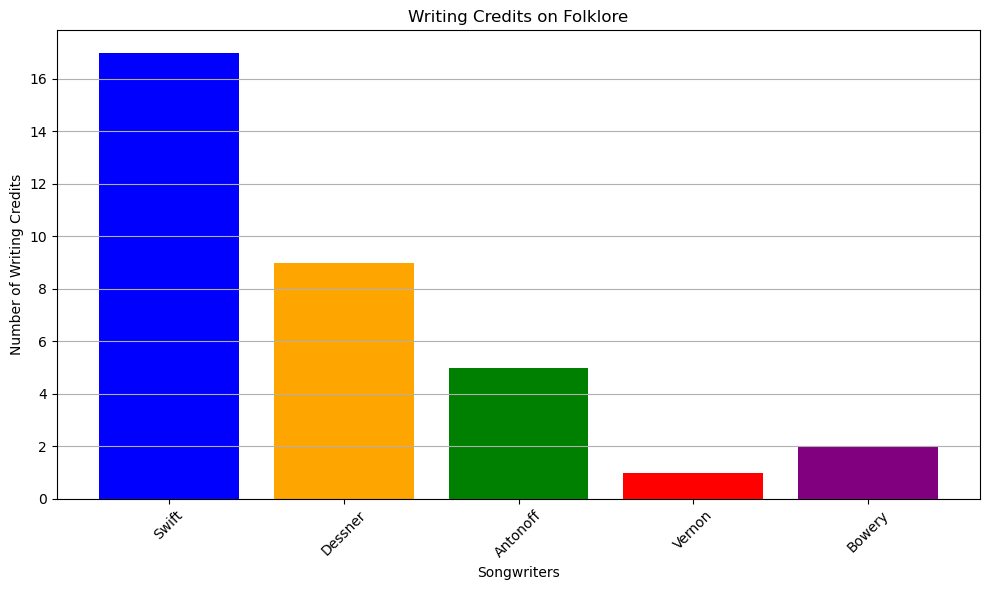

In [115]:

import matplotlib.pyplot as plt

# Define the songwriting credits dictionary
songwriters_dict = {
    1: ['Swift', 'Dessner'],
    2: ['Swift', 'Dessner'],
    3: ['Swift', 'Dessner'],
    4: ['Swift', 'Bowery', 'Vernon'],
    5: ['Swift'],
    6: ['Swift', 'Antonoff'],
    7: ['Swift', 'Dessner'],
    8: ['Swift', 'Antonoff'],
    9: ['Swift', 'Antonoff'],
    10: ['Swift', 'Antonoff'],
    11: ['Swift', 'Dessner'],
    12: ['Swift', 'Dessner'],
    13: ['Swift', 'Dessner'],
    14: ['Swift', 'Bowery'],
    15: ['Swift', 'Dessner'],
    16: ['Swift', 'Dessner'],
    17: ['Swift', 'Antonoff']
}

# Initialize a dictionary to count credits
credit_counts = {
    'Swift': 0,
    'Dessner': 0,
    'Antonoff': 0,
    'Vernon': 0,
    'Bowery': 0
}

# Count the writing credits
for songwriters in songwriters_dict.values():
    for writer in songwriters:
        if writer in credit_counts:
            credit_counts[writer] += 1

# Prepare data for plotting
names = list(credit_counts.keys())
counts = list(credit_counts.values())

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(names, counts, color=['blue', 'orange', 'green', 'red', 'purple'])
plt.title('Writing Credits on Folklore')
plt.xlabel('Songwriters')
plt.ylabel('Number of Writing Credits')
plt.xticks(rotation=45)
plt.grid(axis='y')

# Show the plot
plt.tight_layout()
plt.show()

Results

Who wrote the most songs in the album?
As shown clearly in the graph, Swift has wrote all 17 tracks in her album folklore, even one song written all by herself. 

Who were her main collaborators?
Her main collaborators were Dessner, with 9 tracks to his name and Antonoff, with 5 tracks to his name.

This is interesting as most hit albums tend to have an average of 4.5 songwriters on each song
(https://www.bbc.com/news/entertainment-arts-39934986), but Swift has a maximum of 3 songwriters in a song in 
this album, and mainly only collaborates with either Dessner or Antonoff. 